In [34]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

# Import Binary Alpha Digits

In [35]:
import scipy.io
datafile = scipy.io.loadmat('../../data/binaryalphadigs.mat')

### Explore and Visualize

In [36]:
print(datafile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dat', 'numclass', 'classlabels', 'classcounts'])


In [37]:
def plot_character(x, label, ax):
    ax.imshow(x, cmap='gray')
    ax.axis('off')
    ax.set_title(label)

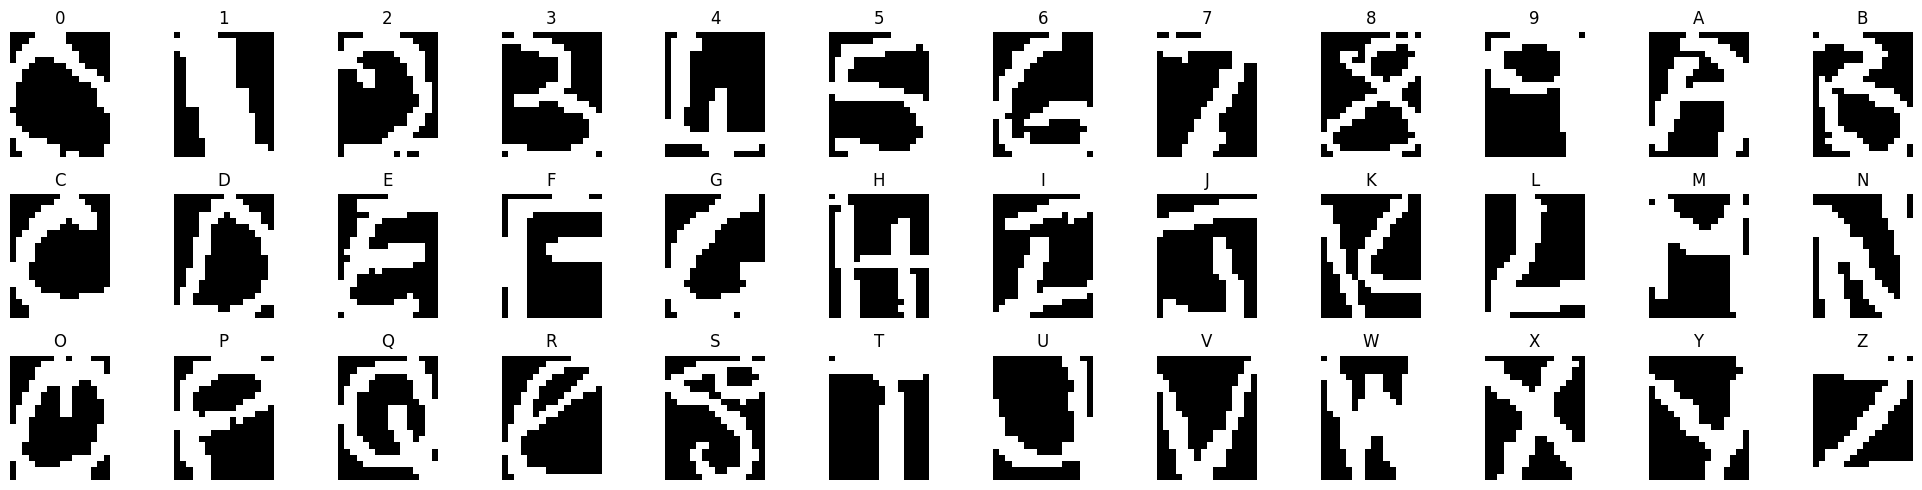

In [38]:
fig, axs = plt.subplots(3, 12, figsize=(20, 5))
for i in range(3):
    for j in range(12):
        index_to_plot = np.random.choice(range(39))
        plot_character(datafile['dat'][12*i+j, index_to_plot], datafile['classlabels'][0][12*i+j][0], axs[i, j])
plt.tight_layout()

# RBM

## Binary Alpha Digits

### RBM class

In [39]:
import sys
sys.path.append('..')

from rbm import RBM
from load_data import lire_alpha_digits

In [40]:
rbm_model = RBM(X=lire_alpha_digits(['A', 'E', 'X']), q=256)

### Training the RBM

Epoch 0: error = 0.424
Epoch 500: error = 0.0412
Epoch 1000: error = 0.0187
Epoch 1500: error = 0.0107
Epoch 2000: error = 0.0076
Epoch 2500: error = 0.0068
Epoch 3000: error = 0.0044
Epoch 3500: error = 0.0043
Epoch 4000: error = 0.0038
Epoch 4500: error = 0.0033
Epoch 4999: error = 0.0029


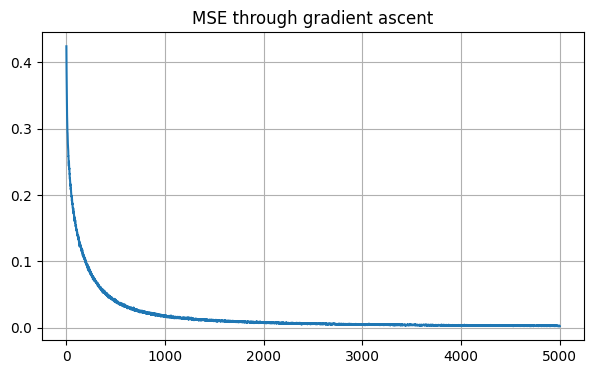

In [41]:
errors = rbm_model.train_RBM(5000, learning_rate=1e-3, batch_size=32, plot_errors=True)

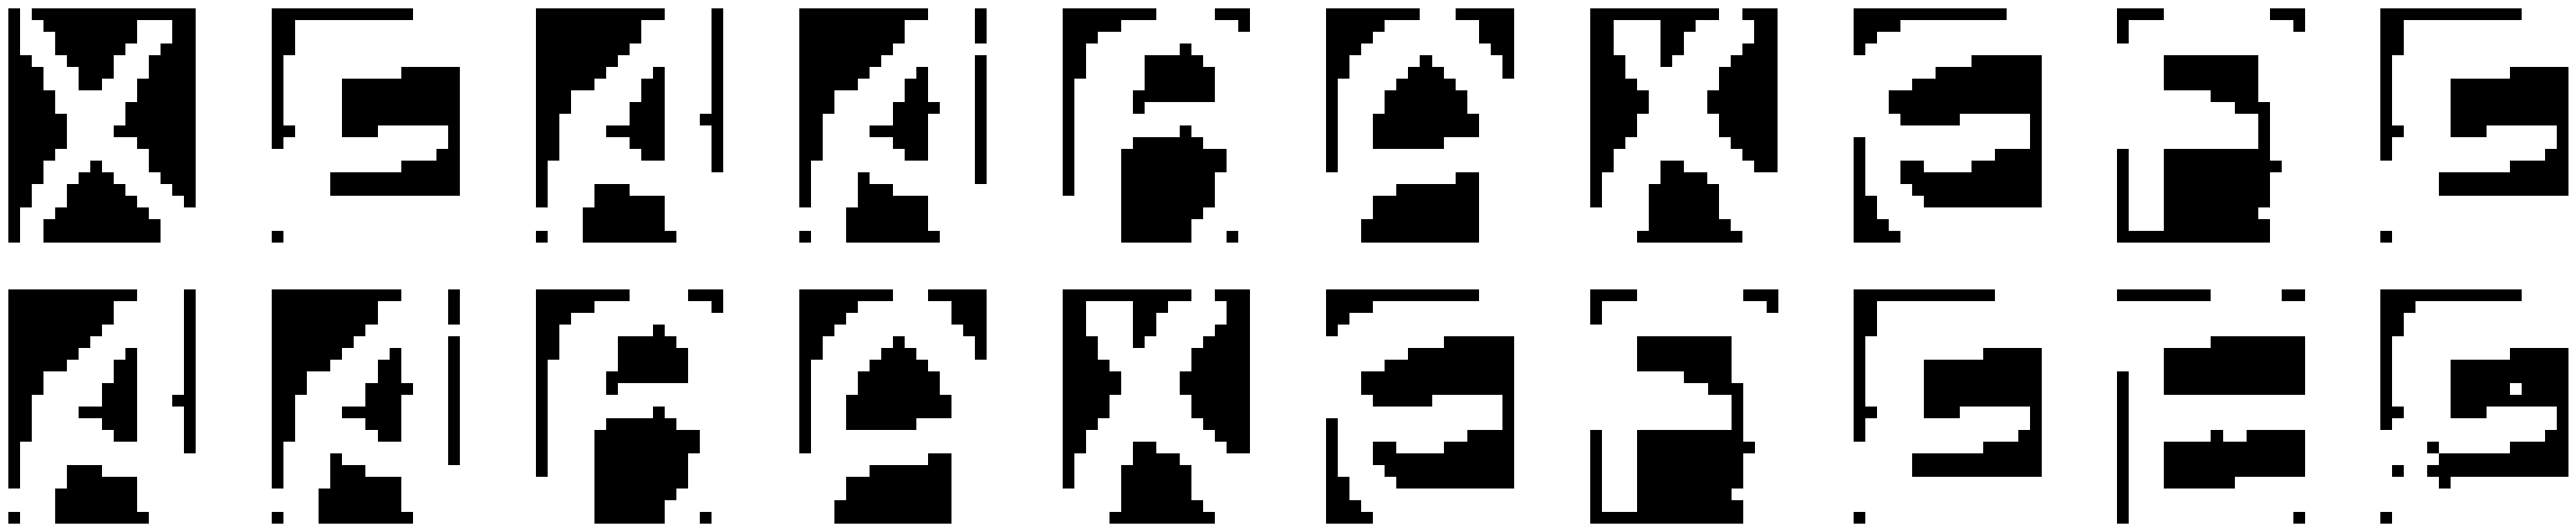

In [42]:
generated_images = rbm_model.generer_image_RBM(1000, 20, ncols=10)

## MNIST

In [43]:
from load_data import load_mnist

In [44]:
X_train, y_train, X_test, y_test = load_mnist()

In [45]:
rbm_mnist = RBM(X=X_test, q=256)

Epoch 0: error = 0.1248
Epoch 100: error = 0.0318
Epoch 200: error = 0.0271
Epoch 300: error = 0.0247
Epoch 400: error = 0.0236
Epoch 500: error = 0.0226
Epoch 600: error = 0.022
Epoch 700: error = 0.0215
Epoch 800: error = 0.0212
Epoch 900: error = 0.0207
Epoch 999: error = 0.0205


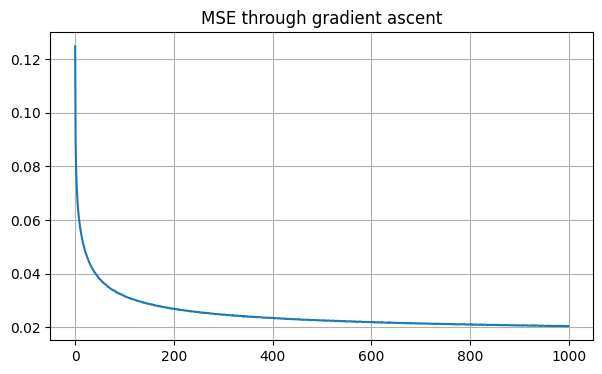

In [46]:
errors = rbm_mnist.train_RBM(1000, learning_rate=1e-3, batch_size=64, plot_errors=True)

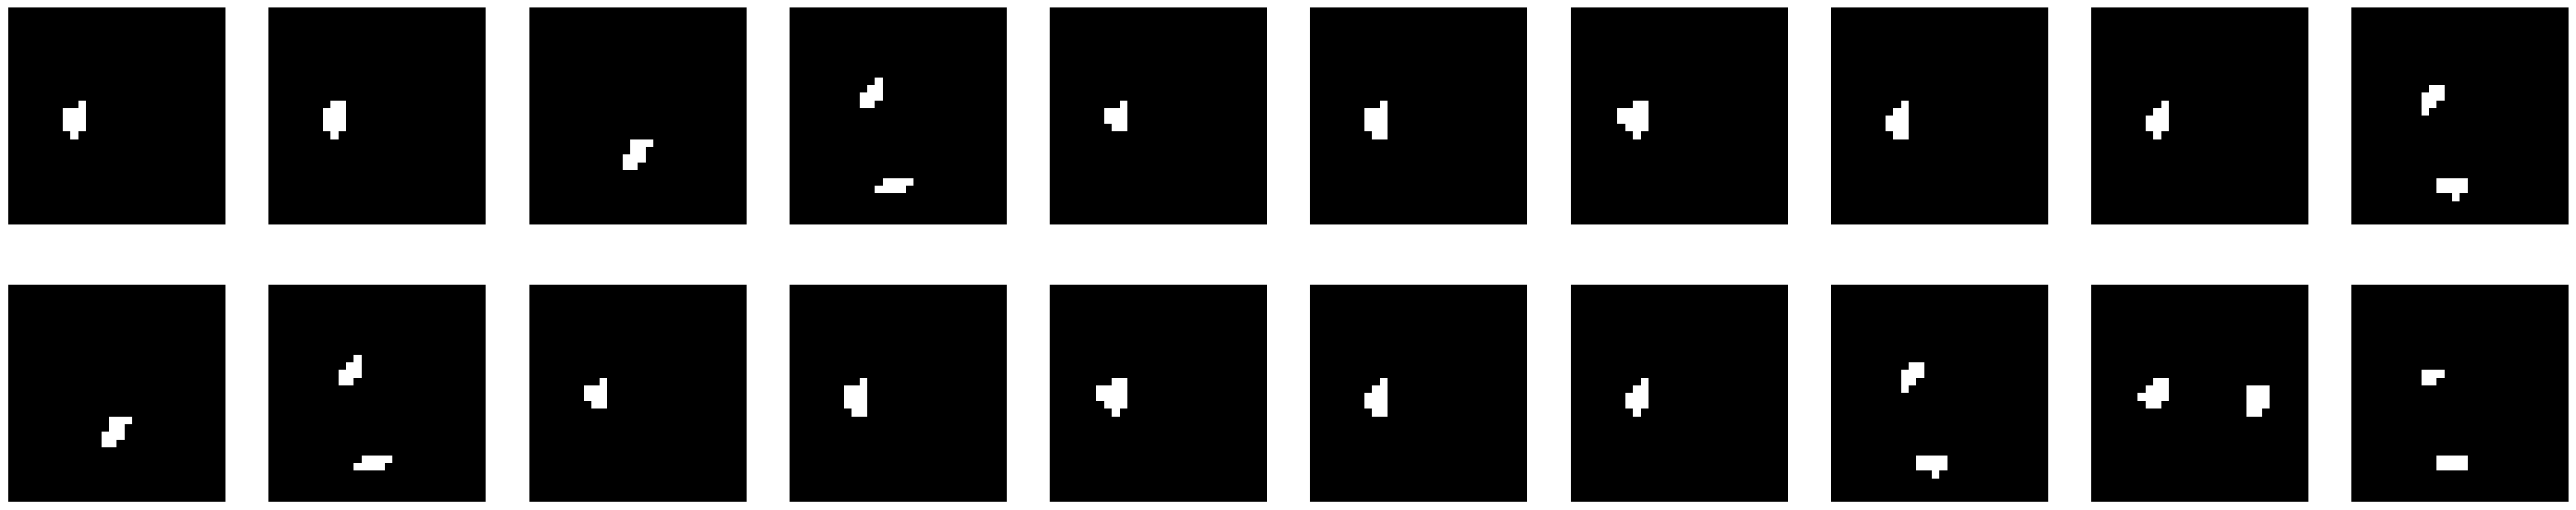

In [48]:
generated_images = rbm_mnist.generer_image_RBM(5000, 20, ncols=10, image_size=(28, 28))